# Assignment 1


**Hugging face agents:**

Hugging Face Agents are advanced tools designed to execute complex workflows using models hosted on Hugging Face. They function like intelligent orchestrators, combining the capabilities of multiple models to accomplish tasks such as text generation, image classification, data processing, etc.


---
**Hugging face pipeline for text generation:**

The Hugging Face Pipeline is a high-level API that simplifies the use of models for various tasks, including text generation. It abstracts the complexity of working with models, allowing you to perform tasks like text generation, translation, summarization, and more with just a few lines of code.


---
**HF inference endpoints:**

is a service offered by Hugging Face that allows developers to deploy their AI models as scalable, cloud-hosted APIs. This service is particularly useful for deploying models in production environments, where the ability to handle high-volume requests and ensure reliable and scalable performance is crucial.


---
**Different models available on the Hugging Face website:**

1- Falconsai/nsfw_image_detection --> image Classification

2- black-forest-labs/FLUX.1-dev --> image generation

3- facebook/bart-large-cnn --> Summarization


# Assignment 2

##Part 1: Generate Captions for Images

In [2]:
from transformers import CLIPProcessor, CLIPModel
from transformers import pipeline
from google.colab import files

# BLIP pre-train model
pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
uplod= files.upload()

Saving 65047.jpg to 65047 (3).jpg
Saving A-Cat.jpg to A-Cat (3).jpg
Saving Doc-P-486967-638503994664327622.jpg to Doc-P-486967-638503994664327622 (3).jpg
Saving Dog_Breeds.jpg to Dog_Breeds (3).jpg
Saving flowers-276014_1280.jpg to flowers-276014_1280 (3).jpg
Saving giant-sequoia-tree-Sequoia-National-Park-California.webp to giant-sequoia-tree-Sequoia-National-Park-California (3).webp
Saving GiraffaCamelopardalisTippelskirchi-Masaai-Mara.JPG to GiraffaCamelopardalisTippelskirchi-Masaai-Mara (3).JPG
Saving images (1).jfif to images (1) (3).jfif
Saving images (2).jfif to images (2) (3).jfif
Saving images.jfif to images (5).jfif
Saving Male_lion_picture._Shot_by_Vikta_JuiceBoy.jpg to Male_lion_picture._Shot_by_Vikta_JuiceBoy (3).jpg
Saving one_seed_fruits.png to one_seed_fruits (3).png
Saving photo.jpg to photo (3).jpg
Saving photo-1533450718592-29d45635f0a9.jfif to photo-1533450718592-29d45635f0a9 (3).jfif
Saving pngtree-golden-retriever-dog-running-on-white-background-png-image_7096062.

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import requests

# Create a list to store images
images = []

# Loop and open each image
for filename in uplod.keys ():
  # Open the image file
  image = Image.open(filename).resize((224,224))
  images.append(image)



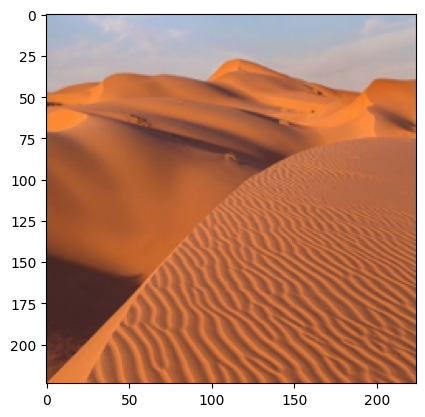

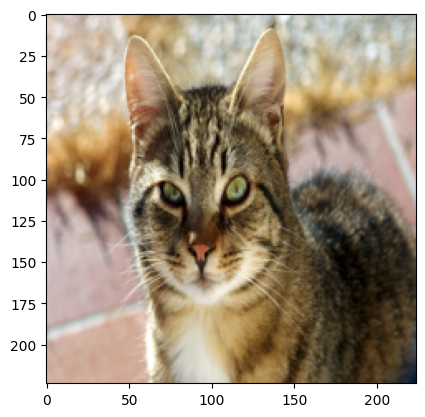

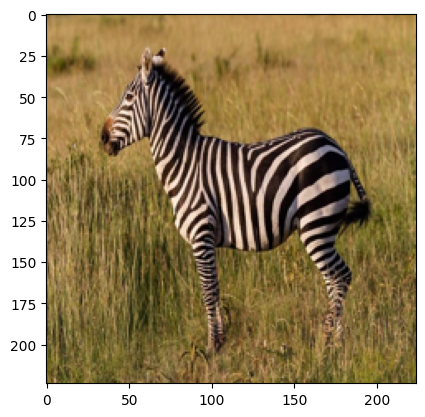

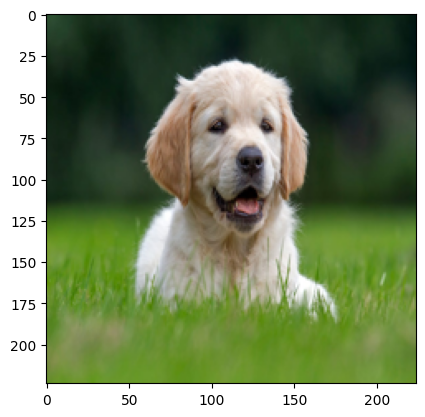

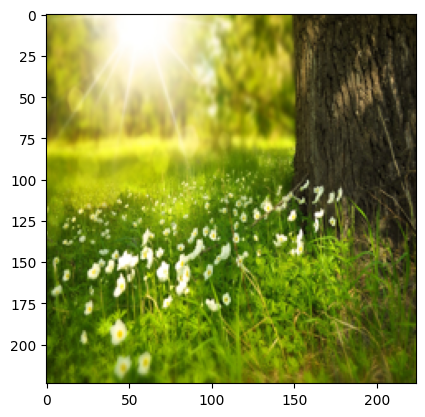

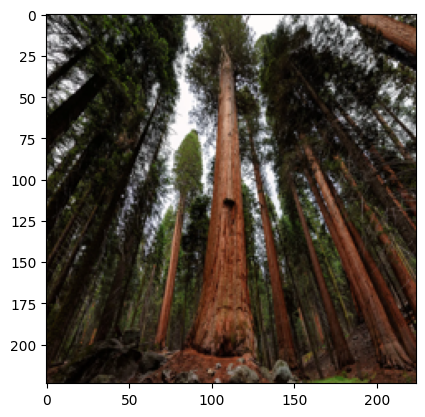

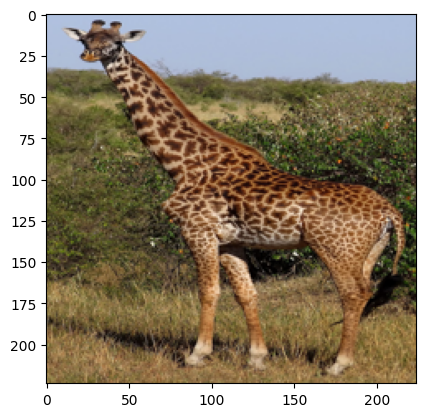

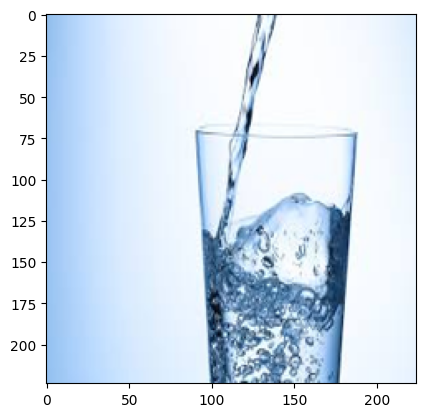

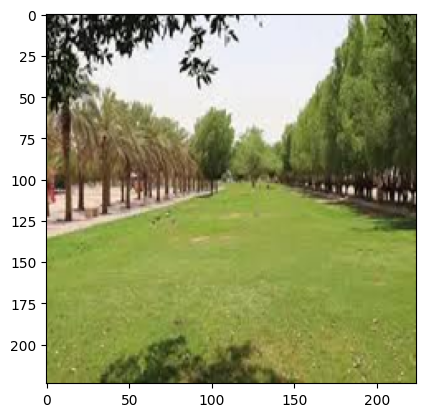

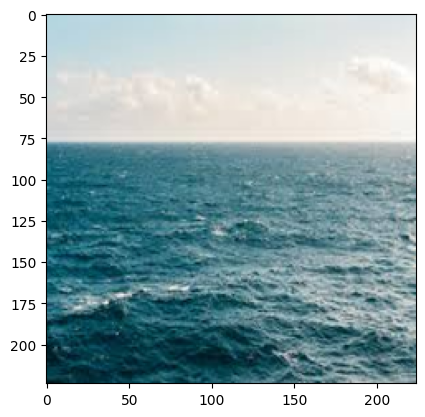

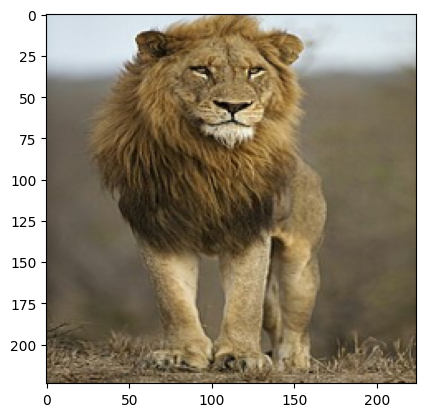

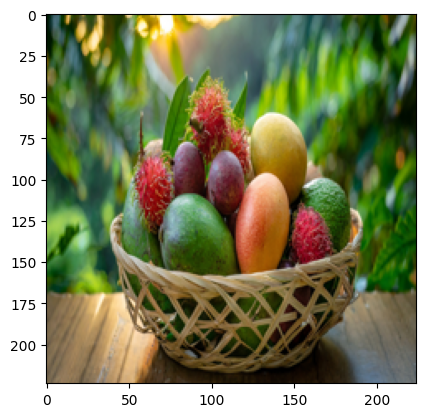

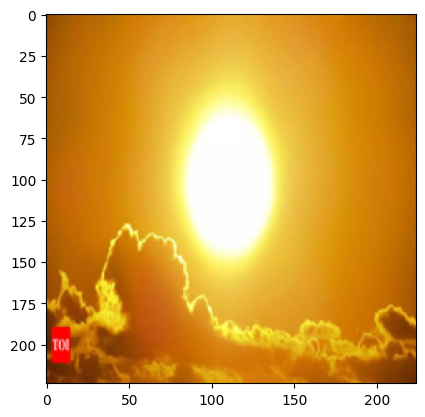

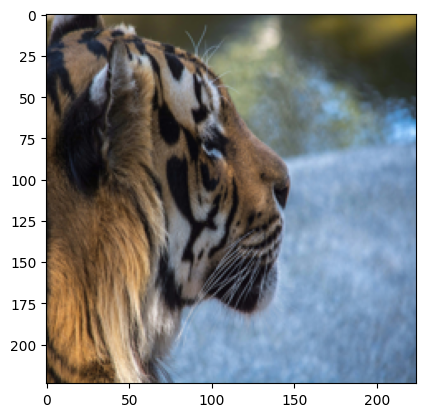

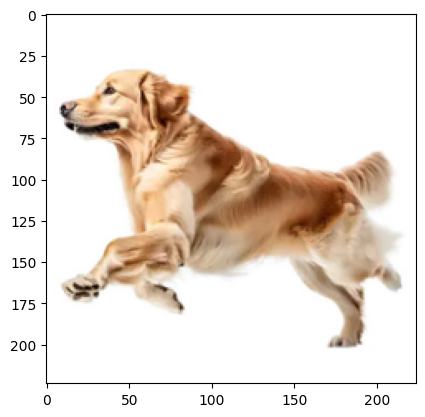

In [5]:
# Display each image
for image in images:
  plt.imshow(np.asarray(image))
  plt.show()


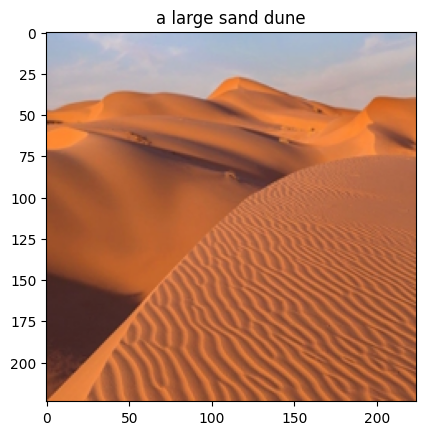

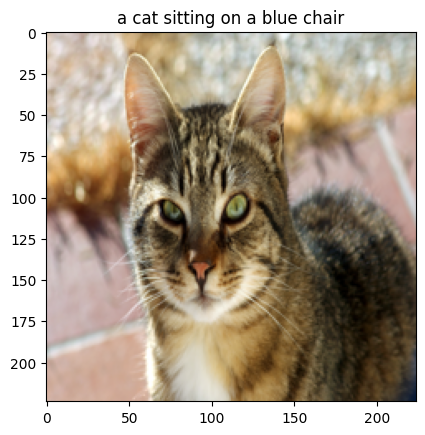

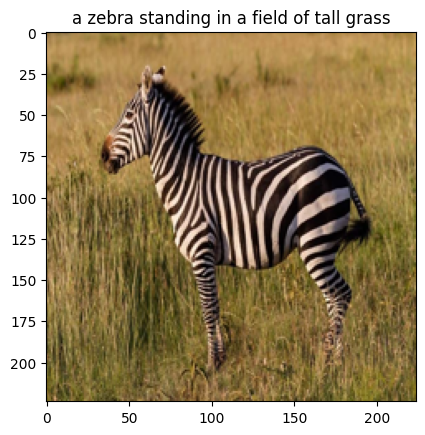

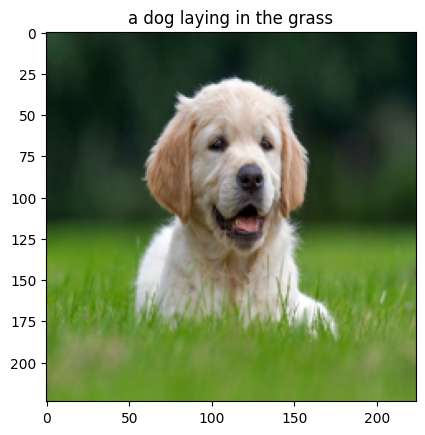

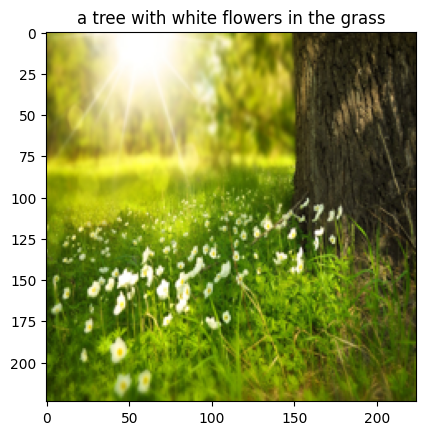

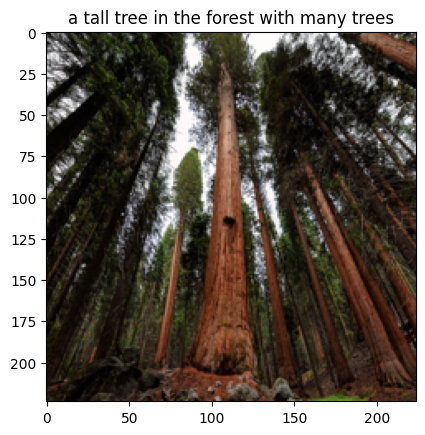

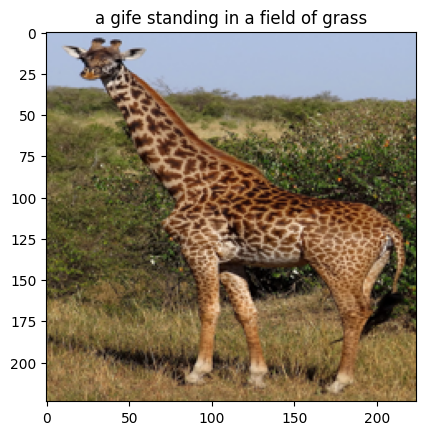

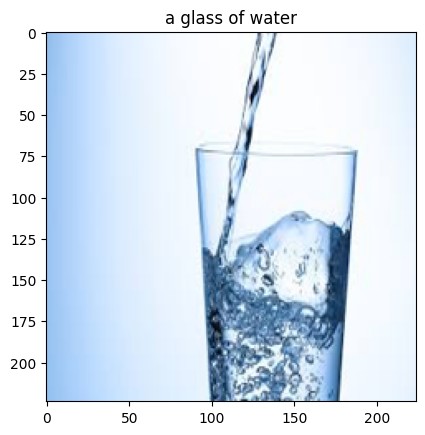

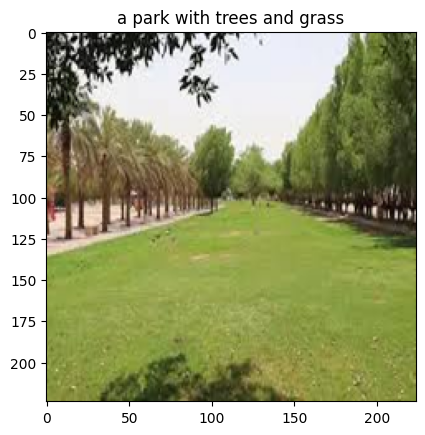

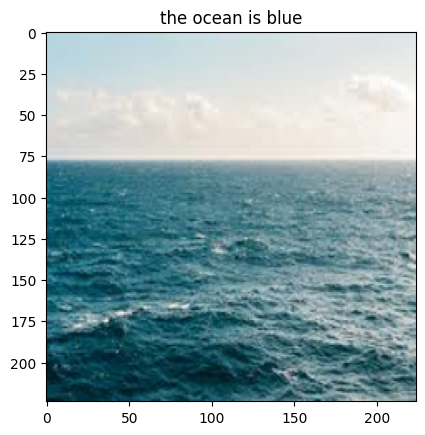

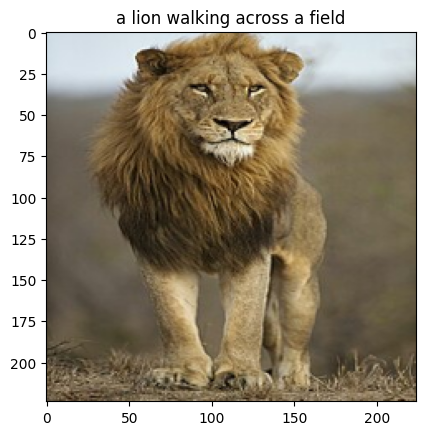

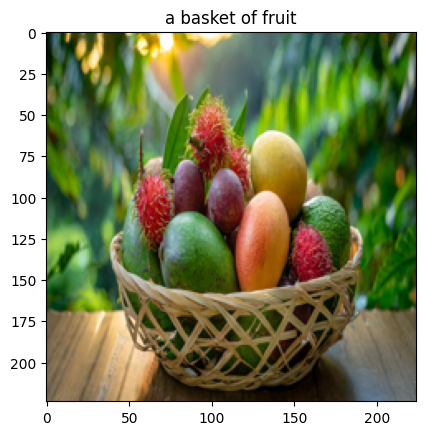

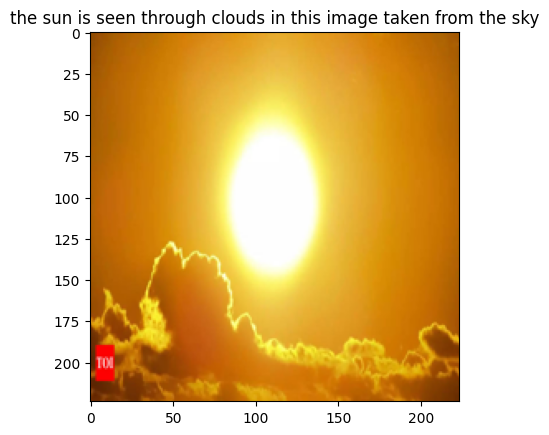

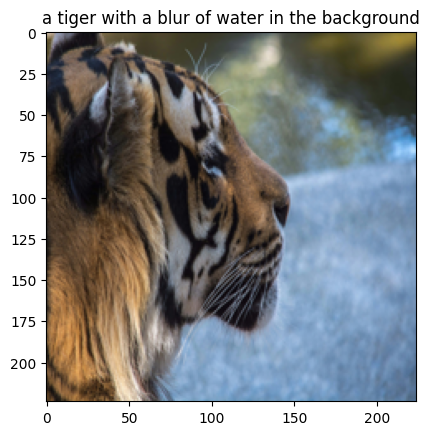

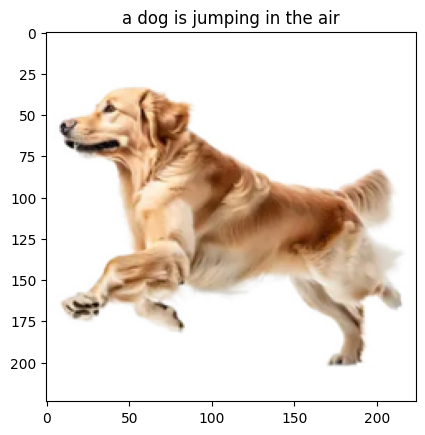

In [9]:
captions=[]

for image in images:
  caption= pipe(image)[0]['generated_text']
  captions.append(caption)
  plt.imshow(np.asarray(image))
  plt.title(caption)
  plt.show()



##Part 2: Build an Image Search Engine

In [12]:
from transformers import CLIPProcessor, CLIPModel

#CLIP pre-train model
point= 'openai/clip-vit-base-patch32'


model = CLIPModel.from_pretrained(point)
processor = CLIPProcessor.from_pretrained(point)


In [13]:
captions =  [input("input:")]


inputs = processor(
    text=captions, images=images,
    return_tensors='pt', padding=True
)

outputs = model(**inputs)

prob = outputs.logits_per_image.argmax()
prob

input:sand


tensor(0)

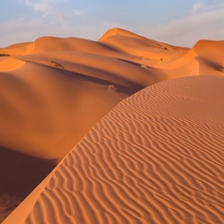

In [14]:
images[prob.item()]